In [1]:
#On importe les modules nécessaires
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import scipy.special as special
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150 #Simplement pour avoir une meilleure résolution

In [2]:
#La fonction exacte

#On crée les ordonnées
U_exacte = np.arange(0, 8.1, 0.1)

#On défini la fonction correspondant à la suite de données exactes
def exact(u):
    return u/2-2+4*integrate.quad(lambda x: special.jv(1,x)/(x*(1+np.exp(u*x/2))),0,np.inf)[0]

#On calcule ces données
d_exacte = []
for i in U_exacte:
    d_exacte.append(exact(i))#Si on envoi U_exacte à la fonction on se retrouve avec une erreur selon quoi on ne peut qu'envoyer un scalaire

<ipython-input-2-d1668a1849f1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return u/2-2+4*integrate.quad(lambda x: special.jv(1,x)/(x*(1+np.exp(u*x/2))),0,np.inf)[0]
<ipython-input-2-d1668a1849f1>:8: RuntimeWarning: overflow encountered in exp
  return u/2-2+4*integrate.quad(lambda x: special.jv(1,x)/(x*(1+np.exp(u*x/2))),0,np.inf)[0]
<ipython-input-2-d1668a1849f1>:8: RuntimeWarning: overflow encountered in double_scalars
  return u/2-2+4*integrate.quad(lambda x: special.jv(1,x)/(x*(1+np.exp(u*x/2))),0,np.inf)[0]


In [3]:
#Données sans Amas
fichier = "gap.dat"
with open(fichier) as f:
    data = pd.read_csv(f,sep="\t")

#On fait des array à partir des colonne des structures pandas
U=data["U"].to_numpy()
L_12=data["L_12"].to_numpy()
L_infini=data["L_infini"].to_numpy()

In [4]:
#Données avec Amas
fichier_amas = r"gapc.dat"
with open(fichier_amas, 'r') as f:
    data_amas  = pd.read_csv(f,sep="\t")

#On fait des array à partir des colonne des structures pandas
U_amas=data_amas["U"].to_numpy()
L_12_amas=data_amas["L_12"].to_numpy()
L_infini_amas=data_amas["L_infini"].to_numpy()

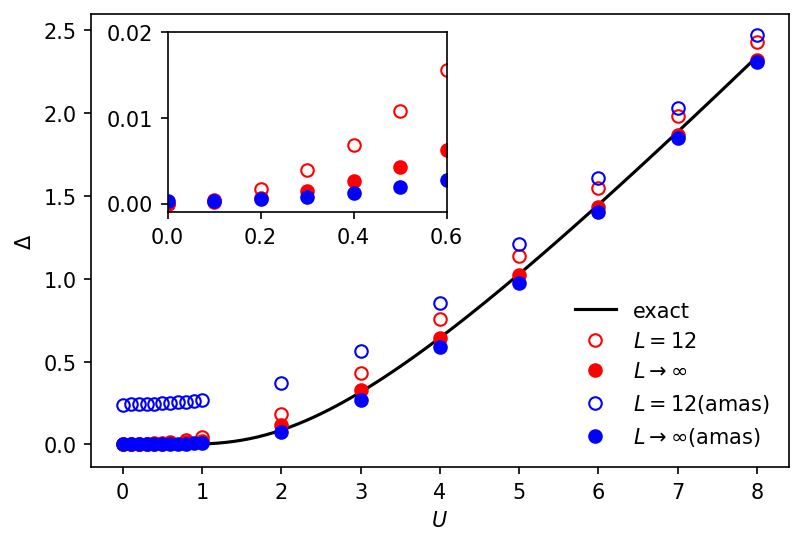

In [5]:
#On crée la figure et on nome les axes
plt.figure()
plt.xlabel("$U$")
plt.ylabel("$\Delta$")

#On graphe les séries de données
plt.plot(U_exacte, d_exacte,c="black",label="exact")

plt.plot(U,L_12,linewidth=0,marker="o",fillstyle="none",c="red",label="$L=12$")
plt.plot(U,L_infini,linewidth=0,marker="o",c="red",label="$L\\rightarrow\infty$")

plt.plot(U_amas,L_12_amas,linewidth=0,marker="o",fillstyle="none",c="blue",label="$L=12$(amas)")
plt.plot(U_amas,L_infini_amas,linewidth=0,marker="o",c="blue",label="$L\\rightarrow\infty$(amas)")

#On affiche la légende
plt.legend(loc=4,frameon=False)

#On graphe le sous-graphique dans le coin supérieur gauche
plt.axes([0.21,0.55,0.31,0.30])

plt.plot(U,L_12,linewidth=0,marker="o",fillstyle="none",c="red",label="$L=12$")
plt.plot(U,L_infini,linewidth=0,marker="o",c="red",label="$L\\rightarrow\infty$")

plt.plot(U_amas,L_infini_amas,linewidth=0,marker="o",c="blue",label="$L\\rightarrow\infty$(amas)")

#On change les paramètre d'affichage pour le plus petit graphe
plt.ylim(-0.001,0.02)
plt.xlim(0,0.6)

#On affiche le graphique
plt.show()